# Smart techniques in Bioinformatics

#### In this notebook, we explore the data and face MA against clustering to identify those proteins whose presence or absence could affect on human infarcts.

First, we use MA technique to capture outliers. That give us an aproximation of what we are searching for. Then we use k-means clustering technique trying to achieve more accurate results.

In [123]:
dts <- read.csv('data.tsv',sep = '\t' ,header=TRUE)
head(dts)

X00Annotation,short_description,uniprot_id,Astrocyte...cerebellum..donor1.CNhs11321.11500.119F6,Astrocyte...cerebral.cortex..donor1.CNhs10864.11235.116D2,brain..adult..donor1.CNhs11796.10084.102B3,brain..adult..pool1.CNhs10617.10012.101C3,brain..fetal..pool1.CNhs11797.10085.102B4,breast..adult..donor1.CNhs11792.10080.102A8,cerebellum...adult..donor10196.CNhs13799.10173.103C2,⋯,thalamus...adult..donor10196.CNhs13794.10168.103B6,thalamus..adult..donor10252.CNhs12314.10154.103A1,thalamus..adult..donor10258..tech_rep1.CNhs14223.10370.105G1,thalamus..adult..donor10258..tech_rep2.CNhs14551.10370.105G1,thalamus..newborn..donor10223.CNhs14084.10366.105F6,throat..fetal..donor1.CNhs11770.10061.101H7,thyroid..fetal..donor1.CNhs11769.10060.101H6,tongue.epidermis..fungiform.papillae...donor1.CNhs13460.10288.104F9,umbilical.cord..fetal..donor1.CNhs11765.10057.101H3,uterus..fetal..donor1.CNhs11763.10055.101H1
"chr10:100013403..100013414,-","p@chr10:100013403..100013414,-",NA,0.00,0.00,0,0,0,0.00,0,⋯,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
"chr10:100027943..100027958,-",p1@LOXL4,uniprot:Q96JB6,0.12,11.45,0,0,0,2.17,0,⋯,5.80,0.31,5.65,2.99,0,1.19,1.01,2.58,7.04,4.48
"chr10:100076685..100076699,+","p@chr10:100076685..100076699,+",NA,0.00,0.00,0,0,0,0.00,0,⋯,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
"chr10:100150910..100150935,-","p@chr10:100150910..100150935,-",NA,0.00,0.00,0,0,0,0.00,0,⋯,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
"chr10:100150951..100150962,-","p@chr10:100150951..100150962,-",NA,0.00,0.00,0,0,0,0.00,0,⋯,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
"chr10:100150986..100150988,+","p@chr10:100150986..100150988,+",NA,0.00,0.00,0,0,0,0.00,0,⋯,0.83,0.00,0.00,0.64,0,0.00,0.00,0.00,0.00,0.00


### Data cleaning

#### Shorten info

We remove the first and the second row because it is enough just with uniprot_id for out purpose.

In [124]:
dts <- dts[,-1:-2]
cat("Number of gens: ", nrow(dts), "\n") 
cat("Number of tissues: ", ncol(dts)) 

Number of gens:  201802 
Number of tissues:  71

#### Remove missing values

In [125]:
dts <- na.omit(dts)
dts <- subset(dts, uniprot_id!="")
head(dts)

,uniprot_id,Astrocyte...cerebellum..donor1.CNhs11321.11500.119F6,Astrocyte...cerebral.cortex..donor1.CNhs10864.11235.116D2,brain..adult..donor1.CNhs11796.10084.102B3,brain..adult..pool1.CNhs10617.10012.101C3,brain..fetal..pool1.CNhs11797.10085.102B4,breast..adult..donor1.CNhs11792.10080.102A8,cerebellum...adult..donor10196.CNhs13799.10173.103C2,cerebellum..adult..donor10252.CNhs12323.10166.103B4,cerebellum..newborn..donor10223.CNhs14075.10357.105E6,⋯,thalamus...adult..donor10196.CNhs13794.10168.103B6,thalamus..adult..donor10252.CNhs12314.10154.103A1,thalamus..adult..donor10258..tech_rep1.CNhs14223.10370.105G1,thalamus..adult..donor10258..tech_rep2.CNhs14551.10370.105G1,thalamus..newborn..donor10223.CNhs14084.10366.105F6,throat..fetal..donor1.CNhs11770.10061.101H7,thyroid..fetal..donor1.CNhs11769.10060.101H6,tongue.epidermis..fungiform.papillae...donor1.CNhs13460.10288.104F9,umbilical.cord..fetal..donor1.CNhs11765.10057.101H3,uterus..fetal..donor1.CNhs11763.10055.101H1
2,uniprot:Q96JB6,0.12,11.45,0.00,0.00,0.00,2.17,0.00,0.22,1.03,⋯,5.80,0.31,5.65,2.99,0.00,1.19,1.01,2.58,7.04,4.48
7,uniprot:Q8N2H3,7.51,6.30,3.88,3.71,2.00,5.07,1.53,1.99,6.72,⋯,4.15,7.34,4.23,3.84,4.28,15.24,11.92,7.74,7.04,15.87
8,uniprot:Q8N2H3,3.69,3.43,1.94,0.65,0.00,0.00,1.53,0.55,1.55,⋯,0.83,2.69,2.82,1.92,0.00,3.33,3.03,2.58,2.35,5.29
15,"uniprot:Q92902,uniprot:Q658M9,uniprot:Q8WXE5",35.58,20.61,30.05,21.71,19.96,31.90,13.73,20.79,21.72,⋯,15.75,26.89,24.00,26.24,12.83,19.76,22.03,12.90,32.85,17.09
24,uniprot:Q8WWQ2,0.00,0.00,0.00,1.02,0.00,0.00,0.00,2.99,0.00,⋯,5.80,8.38,4.23,8.96,0.71,0.71,0.00,0.00,7.04,5.70
25,uniprot:Q8WWQ2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,1.66,0.10,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00


#### Group repeated experiments of the same protein

As we can see there are some repeated experiments so we group them and store the mean of their gene expresion. There are some experiments in which more than one gen was measured but we will treat them as if they were a single gen.

In [126]:
library(plyr)
small_dts <- ddply(dts, 'uniprot_id', numcolwise(mean))

#### Change index

Now, to work more confortable, we assign the protein's id as indexes of the data frame. In addition, that ensure that experiments are unique and therefore step above worked.

In [127]:
rownames(small_dts) <- small_dts$uniprot_id

uniprot_id is then removed from columns

In [128]:
small_dts <- small_dts[,-1]
tail(small_dts)

,Astrocyte...cerebellum..donor1.CNhs11321.11500.119F6,Astrocyte...cerebral.cortex..donor1.CNhs10864.11235.116D2,brain..adult..donor1.CNhs11796.10084.102B3,brain..adult..pool1.CNhs10617.10012.101C3,brain..fetal..pool1.CNhs11797.10085.102B4,breast..adult..donor1.CNhs11792.10080.102A8,cerebellum...adult..donor10196.CNhs13799.10173.103C2,cerebellum..adult..donor10252.CNhs12323.10166.103B4,cerebellum..newborn..donor10223.CNhs14075.10357.105E6,dura.mater..adult..donor1.CNhs10648.10041.101F5,⋯,thalamus...adult..donor10196.CNhs13794.10168.103B6,thalamus..adult..donor10252.CNhs12314.10154.103A1,thalamus..adult..donor10258..tech_rep1.CNhs14223.10370.105G1,thalamus..adult..donor10258..tech_rep2.CNhs14551.10370.105G1,thalamus..newborn..donor10223.CNhs14084.10366.105F6,throat..fetal..donor1.CNhs11770.10061.101H7,thyroid..fetal..donor1.CNhs11769.10060.101H6,tongue.epidermis..fungiform.papillae...donor1.CNhs13460.10288.104F9,umbilical.cord..fetal..donor1.CNhs11765.10057.101H3,uterus..fetal..donor1.CNhs11763.10055.101H1
"uniprot:Q9Y6Y8,uniprot:F5H0L8",29.55,34.63,35.87,26.530,31.94,42.77,64.08,34.17,42.93,43.730,⋯,53.07,24.72,31.06,41.81,43.47,51.66,62.450,51.60,44.58,39.060
"uniprot:Q9Y6Y9,uniprot:D0VAW8",0.00,0.00,0.00,0.185,0.00,0.72,0.00,0.11,0.26,1.485,⋯,0.83,0.52,0.00,0.00,1.07,0.12,0.305,0.00,0.00,0.405
"uniprot:Q9Y6Y9,uniprot:E5RJJ7",0.49,0.29,2.91,13.080,2.00,18.12,1.53,3.10,4.66,29.190,⋯,11.61,12.10,7.06,7.25,14.96,5.24,1.410,2.58,9.39,7.730
uniprot:Q9Y6Z2,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,⋯,0.00,0.21,0.00,0.00,0.00,1.67,3.230,0.00,0.00,0.000
uniprot:Q9Y6Z5,0.37,0.86,0.00,0.280,9.98,0.00,0.00,0.55,3.62,0.000,⋯,0.00,0.41,0.00,0.00,0.00,0.48,0.200,0.00,0.00,0.810
uniprot:Q9Y6Z7,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000


#### Filter only heart tissues columns

We got just two tissues to work with, one taken from a diseased heart and the second from other diseased heart but after a infarct.

In [129]:
hearts <- grepl("heart", colnames(small_dts))
small_dts <- small_dts[hearts]
head(small_dts)

,heart..adult..diseased.post.infarction..donor1.CNhs11757.10050.101G5,heart..adult..diseased..donor1.CNhs11758.10051.101G6
uniprot:A0A183,0.2,0
"uniprot:A0A577,uniprot:Q5ZGI7",0.0,0
uniprot:A0A582,0.0,0
uniprot:A0A583,0.1,0
uniprot:A0A597,0.0,0
uniprot:A0A599,0.0,0


In [130]:
colnames(small_dts) <- c("post_infarct", "pre_infarct")
# transform(small_dts, post_infarct = as.numeric(post_infarct), pre_infarct = as.numeric(pre_infarct))

### Compute MA

MA is a measure that consists on plotting the sum of the gen expressions of two observations on the difference of them. Thereupon,

- A = observ1 + observ2
- M = observ1 - observ2

The more similar the values are, the closer to the x axis they will be. We use scale to normalize the data. It will calculate the mean and standard deviation (sd) of the entire vector, then "scale" each element by those values by subtracting the mean and dividing by the sd.

In [131]:
A <- scale(rowSums(small_dts))
M <- scale(rowSums(transform(small_dts, pre_infarct = -(pre_infarct))))
head(M)

uniprot:A0A183,0.03919355
"uniprot:A0A577,uniprot:Q5ZGI7",0.03746721
uniprot:A0A582,0.03746721
uniprot:A0A583,0.03833038
uniprot:A0A597,0.03746721
uniprot:A0A599,0.03746721


#### Plot results

We can observe that there are a few outliers.

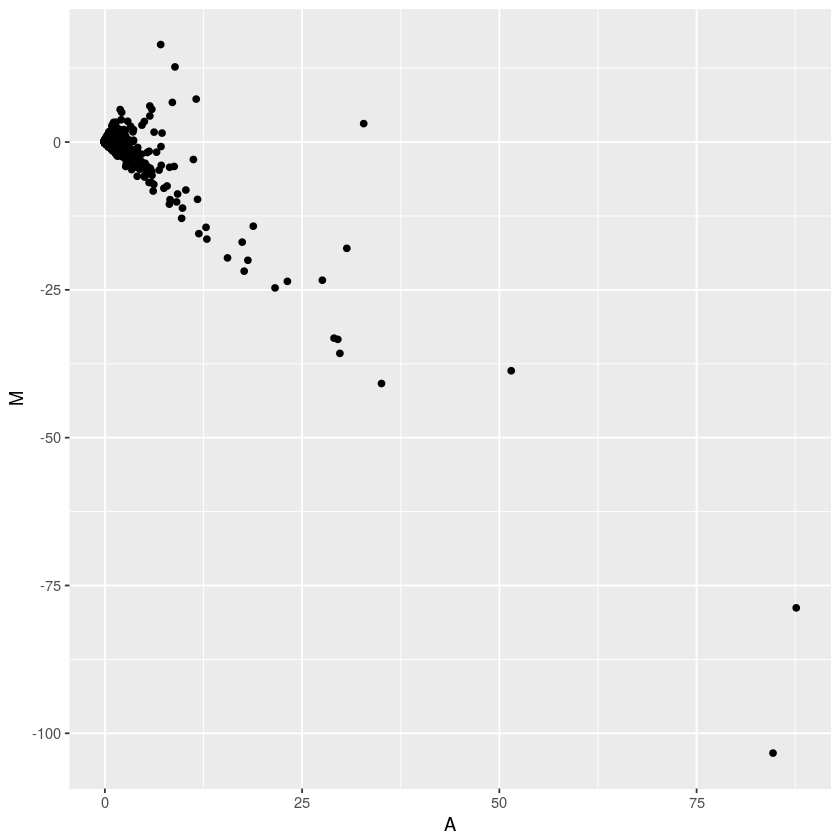

In [132]:
library(ggplot2)

sct <- ggplot(small_dts, aes(y=M, x=A)) + geom_point()
sct

We zoom on the two outliers on the lower right corner and show their uniprot_ids.

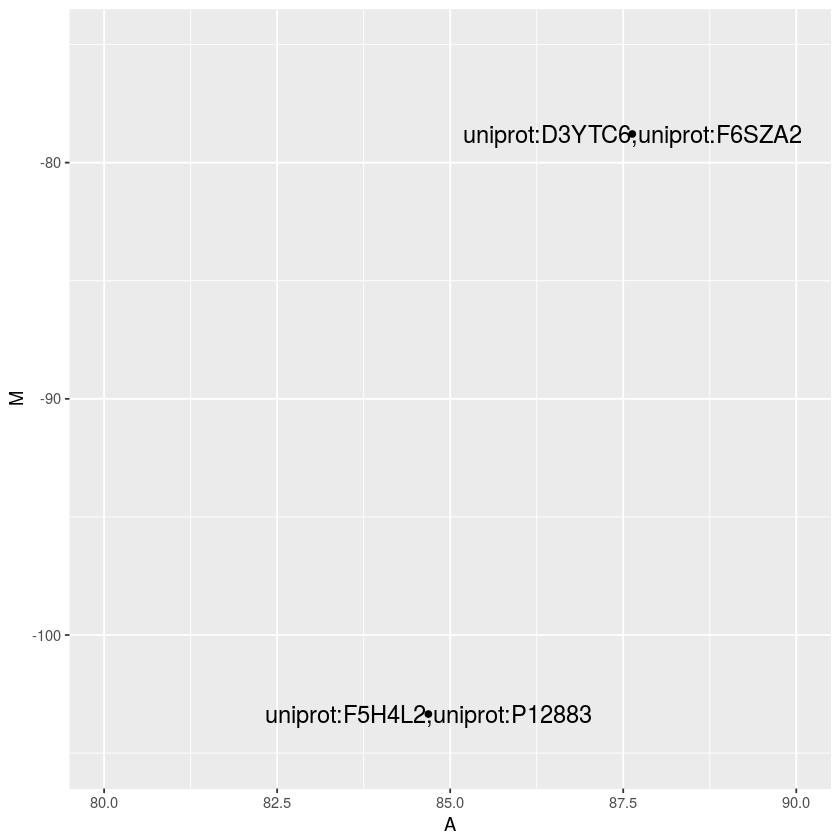

In [133]:
sct + coord_cartesian(xlim = c(80,90),ylim= c(-75,-105)) +  geom_text(aes(label=rownames(small_dts)), size = 5)

And do the same on the center of the graphic where the are some values that differ, less than the two above, from the others.

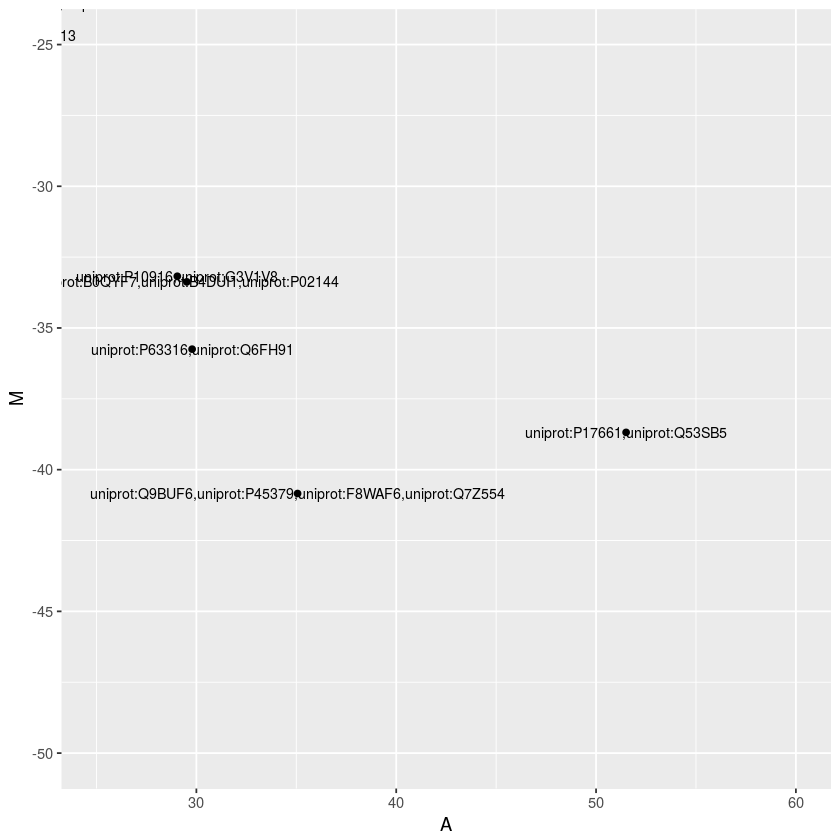

In [134]:
sct + coord_cartesian(xlim = c(25,60),ylim= c(-25,-50)) +  geom_text(aes(label=rownames(small_dts)), size = 3)

Unless we use an interactive plot, this does not seem to be a good method to visualize outliers.

### Compute K-Means

#### K-Means for 2 clusters.

We chose 2 clusters because we want to divide gens in two groups: One that affects on infarcts, on the other that does not.

In [136]:
nhc_kmeans <- kmeans(small_dts,2)

Looking at the results, it seems that there are some genes that modify their behaviour once an infarct affects the patient.

In [137]:
cat("Size of clusters")
data.frame(nhc_kmeans$size, row.names = c('Cluster 1', 'Cluster 2'))

Size of clusters

,nhc_kmeans.size
Cluster 1,31437
Cluster 2,15


In [141]:
htmap <- t(as.data.frame(nhc_kmeans$cluster))
fil <- htmap[,htmap[1,]==2, drop=FALSE]
head(colnames(fil))

[1] "uniprot:B0QYF7,uniprot:B4DUI1,uniprot:P02144"                              
[2] "uniprot:B4DL87,uniprot:F8WE04"                                             
[3] "uniprot:D3YTC6,uniprot:F6SZA2"                                             
[4] "uniprot:E7ET18,uniprot:A6NKB1,uniprot:E7EQE6,uniprot:Q8WZ42,uniprot:E9PPD3"
[5] "uniprot:F5H4L2,uniprot:P12883"                                             
[6] "uniprot:F8W7I2,uniprot:P41222,uniprot:Q5SQ11"

Now, we can take a look on the original values and see directly their variations.

In [142]:
only_sp <- dts[dts$uniprot_id %in% colnames(fil),]
hearts <- grepl("heart", colnames(only_sp))
only_sp <- only_sp[hearts]

In [143]:
rownames(only_sp) <- colnames(fil)
head(only_sp)

,heart..adult..diseased.post.infarction..donor1.CNhs11757.10050.101G5,heart..adult..diseased..donor1.CNhs11758.10051.101G6
"uniprot:B0QYF7,uniprot:B4DUI1,uniprot:P02144",2664.52,6512.22
"uniprot:B4DL87,uniprot:F8WE04",7359.37,19336.63
"uniprot:D3YTC6,uniprot:F6SZA2",2999.18,5711.28
"uniprot:E7ET18,uniprot:A6NKB1,uniprot:E7EQE6,uniprot:Q8WZ42,uniprot:E9PPD3",2290.52,5024.95
"uniprot:F5H4L2,uniprot:P12883",9245.94,18377.74
"uniprot:F8W7I2,uniprot:P41222,uniprot:Q5SQ11",3167.91,7903.77


### Improving accuracy

Thanks to the first visualization on the MA plot, we saw that there were 2 points that differed more than the others. We can then cluster over the previous cluster and achieve the same result.

In [144]:
ds <- dist(only_sp)
disease_km <- kmeans(ds, 2)

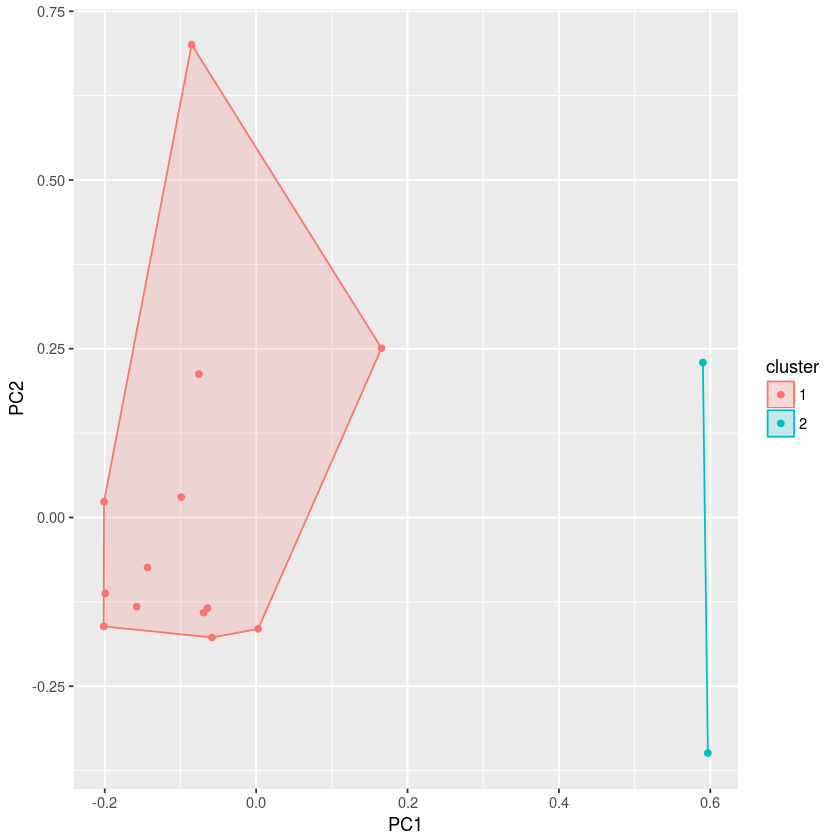

In [145]:
library(ggfortify)
set.seed(1)
clt <- kmeans(only_sp, 2)
autoplot(clt, data = only_sp, frame=T, frame.type = "convex")

We get the names of the outliers within the cluster 2

In [146]:
htmap <- t(as.data.frame(clt$cluster))
fil <- htmap[,htmap[1,]==2, drop=FALSE]
colnames(fil)

[1] "uniprot:B4DL87,uniprot:F8WE04" "uniprot:F5H4L2,uniprot:P12883"

#### Getting information about the proteins.

Now that we have identified two proteins that behave different, we just have to search about them to see what we have found. The first pair, B4DL87 and F8WE04 are similar proteins, so this might be the reason of measure them together. For the second pair, there is not information about F5H4L2, so it is not possible to confirm the same fact.

The role of HSP27 is to inhibit apoptosis whereas Myosin is involved on muscle contraction.

- B4DL87: http://www.uniprot.org/uniprot/B4DL87
- F8WE04 (HSP27): http://www.uniprot.org/uniprot/F8WE04

    - +info: https://en.wikipedia.org/wiki/Hsp27#Clinical_significance

- F5H4L2: http://www.uniprot.org/uniprot/F5H4L2

- P12883 (Myosin): http://www.uniprot.org/uniprot/P12883

    - +info: https://en.wikipedia.org/wiki/MYH7